# Analysis of customer reviews for OnePlus Nord scraped from Amazon website

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns #for plotting


pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

<ipython-input-1-5e2bac0775ca>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
data = pd.read_csv('C:\\Users\\Muthu\\Downloads\\oneplus_nord_review\\oneplus_nord_review.csv')

In [3]:
data.head(5)

,Names,Ratings,Title,Date,Review
0,Aman More,4.0,A good daily driver.,Reviewed in India on 3 August 2020,"\n pros: 1) clean and bloatfree oxygenos, which runs as smooth as they come. 2) amoled screen and 90hz refresh rate really go along to make the display above average. 3) battery life is decent and will last a day on normal usage. 4) sound quality is good and modestly loud. (drawback in cons). 5) the design actually fits the hand well as it is shorter than usual on breadth, and a bit more on length, all the more better viewing experience. 6) gaming performance is average. (similar phones in this range have better gaming performances). 7) the phone looks and feels premium while using. 8) the alert slider makes it very convenient to switch between different modes. 9) face unlock is as fast as other oneplus phones. (very very fast) cons: 1) the camera is not as good as it was expected. the macro lens is pretty useless, and the main camera lacks depth and the colors aren't as vibrant as oneplus 8. a bit too much of beautification was there in selfie shots. 4k video recording @ 60fps is absent but 1080@60fps performance is quite good. (the camera is better than most phones out there but it isn't what we were promised). 2) no headphone jack. 3) the mono speaker is on the bottom right of the phone, which tends to get covered by your hand while using. also, being on just one side of the phone, the audio isn't as well delivered as it is on a stereo speaker. 4) no expandable memory slot. 5) the plastic frame (doesn't look like plastic but it is) is a worrying thing and makes the phone *comparatively* less durable. 6) fingerprint scanner being under the screen isn't as quick as a traditional fingerprint scanner on the back. recommendation: if you're looking for a phone which delivers high performance and smooth interface for your daily use, go for it. but if your prime purpose is gaming, there are better options available. also, if you're expecting flagship camera performance, you might want to consider other phones. (pixel 4a is about to release, that's far better probably) update: pixel 4a camera is surely much better that nord's camera.\n"
1,Kiran KS,4.0,The original segment of one plus,Reviewed in India on 3 August 2020,"\n battery usage update: drains faster than other one plus models..so for the ones travelling frequently, this might not be an ideal phone..fast charging is a relief for ones who have access to charging point... morning to night usage possible with moderate to slightly heavy usage.. bottomline: a good entry phone for those who have never experienced one plus and the ones with budget constraints.. for others, one plus 8t(lighter than pro model at 180 gms) would be ideal which should bring 120hz refresh rate and maybe wireless charging too.and for those who can afford and dont mind a heavy phone(200+ gms), one plus 8 pro or 8t pro would be ideal ones.(as per amazon reviews some users are reporting display issues with 8 pro, so 8t pro hopefully will be a better model.) i still use 7t pro which provides the best of one plus experience.. initial impressions: no tint issue which has been widely reported. smooth given 12gb ram and 90hz refresh rate. lighter than pro model but still feels sturdy. camera quality on par with top model one plus devices in case of outdoor pictures,. indoor/low light pictures are not that good.. not a fan of punch hole cameras.would have preferred full screen with pop up instead. battery usage - needs to be tested but seems to be ok..\n"
2,Nikhil,5.0,*read before you buy!!*,Reviewed in India on 4 August 2020,"\n yea.pre-ordered on 28 july, got it on 4 august. package was nice without any damage. so here is my first impression: • display is so nice and 90 hz refresh rate feels so nice and smooth. •camera is okay, but not upto the mark.macro lens and depth sensor at the back is just crap. wide angle is okay, but images are too smooth without any crispness. •60 fps video recording at 4k is not th

In [4]:
df = data.copy() # Creating a copy of the original data

In [5]:
print('The Dataset has {} rows and {} columns.'.format(len(df), len(df.columns)))

The Dataset has 100 rows and 5 columns.


In [6]:
df['Ratings'].value_counts()

5.0    40
4.0    30
2.0    20
1.0    10
Name: Ratings, dtype: int64

Text(0, 0.5, 'count')

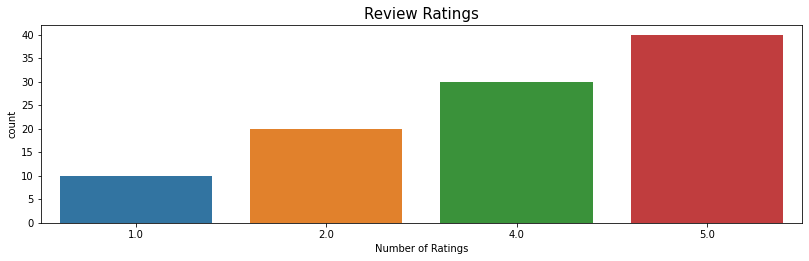

In [7]:
# Ratingd counts

plt.figure(figsize = (30,8))
Ratings = plt.subplot(221)
Ratings = sns.countplot(x="Ratings", data = df,ax=Ratings)
Ratings.set_title("Review Ratings", fontsize=15)
Ratings.set_xlabel("Number of Ratings")
Ratings.set_ylabel("count")


## Review cleaning

All the reviews have '\n' at the end. Let's remove it.

In [8]:
df['Review']=df['Review'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [9]:
df.head(2)

,Names,Ratings,Title,Date,Review
0,Aman More,4.0,A good daily driver.,Reviewed in India on 3 August 2020,"\n pros: 1) clean and bloatfree oxygenos, which runs as smooth as they come. 2) amoled screen and 90hz refresh rate really go along to make the display above average. 3) battery life is decent and will last a day on normal usage. 4) sound quality is good and modestly loud. (drawback in cons). 5) the design actually fits the hand well as it is shorter than usual on breadth, and a bit more on length, all the more better viewing experience. 6) gaming performance is average. (similar phones in this range have better gaming performances). 7) the phone looks and feels premium while using. 8) the alert slider makes it very convenient to switch between different modes. 9) face unlock is as fast as other oneplus phones. (very very fast) cons: 1) the camera is not as good as it was expected. the macro lens is pretty useless, and the main camera lacks depth and the colors aren't as vibrant as oneplus 8. a bit too much of beautification was there in selfie shots. 4k video recording @ 60fps is absent but 1080@60fps performance is quite good. (the camera is better than most phones out there but it isn't what we were promised). 2) no headphone jack. 3) the mono speaker is on the bottom right of the phone, which tends to get covered by your hand while using. also, being on just one side of the phone, the audio isn't as well delivered as it is on a stereo speaker. 4) no expandable memory slot. 5) the plastic frame (doesn't look like plastic but it is) is a worrying thing and makes the phone *comparatively* less durable. 6) fingerprint scanner being under the screen isn't as quick as a traditional fingerprint scanner on the back. recommendation: if you're looking for a phone which delivers high performance and smooth interface for your daily use, go for it. but if your prime purpose is gaming, there are better options available. also, if you're expecting flagship camera performance, you might want to consider other phones. (pixel 4a is about to release, that's far better probably) update: pixel 4a camera is surely much better that nord's camera."
1,Kiran KS,4.0,The original segment of one plus,Reviewed in India on 3 August 2020,"\n battery usage update: drains faster than other one plus models..so for the ones travelling frequently, this might not be an ideal phone..fast charging is a relief for ones who have access to charging point... morning to night usage possible with moderate to slightly heavy usage.. bottomline: a good entry phone for those who have never experienced one plus and the ones with budget constraints.. for others, one plus 8t(lighter than pro model at 180 gms) would be ideal which should bring 120hz refresh rate and maybe wireless charging too.and for those who can afford and dont mind a heavy phone(200+ gms), one plus 8 pro or 8t pro would be ideal ones.(as per amazon reviews some users are reporting display issues with 8 pro, so 8t pro hopefully will be a better model.) i still use 7t pro which provides the best of one plus experience.. initial impressions: no tint issue which has been widely reported. smooth given 12gb ram and 90hz refresh rate. lighter than pro model but still feels sturdy. camera quality on par with top model one plus devices in case of outdoor pictures,. indoor/low light pictures are not that good.. not a fan of punch hole cameras.would have preferred full screen with pop up instead. battery usage - needs to be tested but seems to be ok.."


In [10]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [11]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [12]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [13]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [14]:
df['cleaned_reviews']=df['Review'].apply(lambda x:clean_text(x))

In [15]:
df.sample(5)

,Names,Ratings,Title,Date,Review,cleaned_reviews
57,Deblina Roy,2.0,Disappointing,Reviewed in India on 4 August 2020,"\n heavily disappointed. so much of hype and the camera is not even upto the mark. grainy pictures, looks like i have applied some kind of filter for my selfies. there is no way to undo it. the haptic feedback is good. however, there are several bugs on this phone. hoping that they will get it fixed with an update! also don’t panic and nitpick with screen quality! looks great to me!. but don’t fall for the marketing gimmick. oneplus promised something extraordinary and they have failed. also, there were several troubles while registering my phone for the red cable club. but several attempts and a complaint with the customer care, it was solved.",\n heavili disappoint much hype camera even upto mark graini pictur look like appli kind filter selfi way undo haptic feedback good howev sever bug phone hope get fix updat also dont panic nitpick screen qualiti look great dont fall market gimmick oneplu promis someth extraordinari fail also sever troubl regist phone red cabl club sever attempt complaint custom care solv
99,ATMANAND SHARMA,2.0,Khoda pahad nikli chuihya,Reviewed in India on 6 August 2020,\n average phone from one plus but surprisingly very bad battery life though good battery on paper. disappointed .,\n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint
63,Amit,5.0,Near to mid range perfection,Reviewed in India on 3 August 2020,"\n got it delivered yesterday , used for about 5-6 hours , to tell you this is my first mid ranger previously i was using s9 plus , before that s7 edge and iphones in stone age . my first one plus , a mid ranger , i assure you it's no less a flagship experience , forget bout negative reviews, no device is perfect . this one has looks , power and performance , don't know how useful is 5g modem but who cares that's the baggage we consider it as of now camera unit is also awesome perfoms well and remember it's a bloat free and advt free experience of oxygen os . cons , i am yet to discover enjoy the nord",\n got deliv yesterday use 56 hour tell first mid ranger previous use s9 plu s7 edg iphon stone age first one plu mid ranger assur less flagship experi forget bout neg review devic perfect one look power perform dont know use 5g modem care that baggag consid camera unit also awesom perfom well rememb bloat free advt free experi oxygen os con yet discov enjoy nord
7,Deblina Roy,2.0,Disappointing,Reviewed in India on 4 August 2020,"\n heavily disappointed. so much of hype and the camera is not even upto the mark. grainy pictures, looks like i have applied some kind of filter for my selfies. there is no way to undo it. the haptic feedback is good. however, there are several bugs on this phone. hoping that they will get it fixed with an update! also don’t panic and nitpick with screen quality! looks great to me!. but don’t fall for the marketing gimmick. oneplus promised something extraordinary and they have failed. also, there were several troubles while registering my phone for the red cable club. but several attempts and a complaint with the customer care, it was solved.",\n heavili disappoint much hype camera even upto mark graini pictur look like appli kind filter selfi way undo haptic feedback good howev sever bug phone hope get fix updat also dont panic nitpick screen qualiti look great dont fall market gimmick oneplu promis someth extraordinari fail also sever troubl regist phone red cabl club sever attempt complaint custom care solv
5,Sudeshna Dey,1.0,Bad front camera,Reviewed in India on 3 August 2020,"\n front camera is very bad , and low light photo is also bad. need update in camera section. worst camera. i was also excited about this product like everyone else because i was going with the one plus brand. but if u r investing 28k for a mobile then it should satisfy your basic average needs at least. the camera quality is below average. 

## Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence

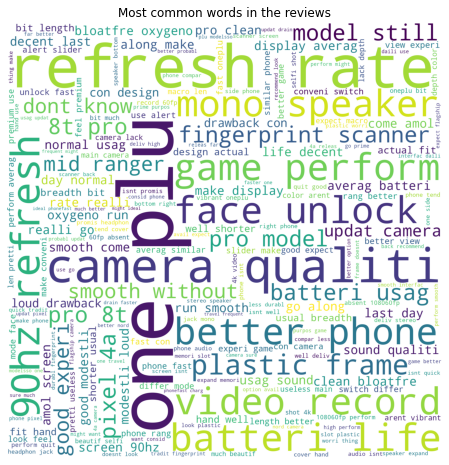

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (30,8))
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

## Analyzing the sentiment of reviews using the library 'vader"

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

In [18]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Defining a function to extract only the compound score.

In [19]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [20]:
df['sentiment_score']=df['Review'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [21]:
df.sample(5)

,Names,Ratings,Title,Date,Review,cleaned_reviews,sentiment_score
51,Kiran KS,4.0,The original segment of one plus,Reviewed in India on 3 August 2020,"\n battery usage update: drains faster than other one plus models..so for the ones travelling frequently, this might not be an ideal phone..fast charging is a relief for ones who have access to charging point... morning to night usage possible with moderate to slightly heavy usage.. bottomline: a good entry phone for those who have never experienced one plus and the ones with budget constraints.. for others, one plus 8t(lighter than pro model at 180 gms) would be ideal which should bring 120hz refresh rate and maybe wireless charging too.and for those who can afford and dont mind a heavy phone(200+ gms), one plus 8 pro or 8t pro would be ideal ones.(as per amazon reviews some users are reporting display issues with 8 pro, so 8t pro hopefully will be a better model.) i still use 7t pro which provides the best of one plus experience.. initial impressions: no tint issue which has been widely reported. smooth given 12gb ram and 90hz refresh rate. lighter than pro model but still feels sturdy. camera quality on par with top model one plus devices in case of outdoor pictures,. indoor/low light pictures are not that good.. not a fan of punch hole cameras.would have preferred full screen with pop up instead. battery usage - needs to be tested but seems to be ok..",\n batteri usag updat drain faster one plu modelsso one travel frequent might ideal phonefast charg relief one access charg point morn night usag possibl moder slightli heavi usag bottomlin good entri phone never experienc one plu one budget constraint other one plu 8tlighter pro model 180 gm would ideal bring 120hz refresh rate mayb wireless charg tooand afford dont mind heavi phone200 gm one plu 8 pro 8t pro would ideal onesa per amazon review user report display issu 8 pro 8t pro hope better model still use 7t pro provid best one plu experi initi impress tint issu wide report smooth given 12gb ram 90hz refresh rate lighter pro model still feel sturdi camera qualiti par top model one plu devic case outdoor pictur indoorlow light pictur good fan punch hole cameraswould prefer full screen pop instead batteri usag need test seem ok,0.7840
59,ATMANAND SHARMA,2.0,Khoda pahad nikli chuihya,Reviewed in India on 6 August 2020,\n average phone from one plus but surprisingly very bad battery life though good battery on paper. disappointed .,\n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint,-0.5704
2,Nikhil,5.0,*read before you buy!!*,Reviewed in India on 4 August 2020,"\n yea.pre-ordered on 28 july, got it on 4 august. package was nice without any damage. so here is my first impression: • display is so nice and 90 hz refresh rate feels so nice and smooth. •camera is okay, but not upto the mark.macro lens and depth sensor at the back is just crap. wide angle is okay, but images are too smooth without any crispness. •60 fps video recording at 4k is not there at rear cam, but is present for front cam. don't know why they did that😅. •premium user-experience. •face unlock and in-display fingerprint is good. •phone lacks a true premium feel due to the plastic frame. •the signature slide button delivers the same good experience. okay, so if you feel that you need a 5g chipset and be future-proof, definitely go for it. if you want a flagship perfomance, go for k20 pro or oneplus 7t as this wont be a good choice for heavy users, but still a good experience in regards of games for a short-run(cod in high graphics and frame rate ran smooth without any sudden frame drops, because it got an overclocked gpu). stilli am satisfied with what i got here✌️ *updated*. •excellent charging speed(thanks to warp charge, 10 to 100 in less than an hour). •battery backup is so good for daily users. lasts almost a day. •no serious heating issues at all. •this is a mid-range phone(one of the best) and should not expect a mo

We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [22]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [23]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [24]:
df.sample(5)

,Names,Ratings,Title,Date,Review,cleaned_reviews,sentiment_score,review_category
31,Kiran KS,4.0,The original segment of one plus,Reviewed in India on 3 August 2020,"\n battery usage update: drains faster than other one plus models..so for the ones travelling frequently, this might not be an ideal phone..fast charging is a relief for ones who have access to charging point... morning to night usage possible with moderate to slightly heavy usage.. bottomline: a good entry phone for those who have never experienced one plus and the ones with budget constraints.. for others, one plus 8t(lighter than pro model at 180 gms) would be ideal which should bring 120hz refresh rate and maybe wireless charging too.and for those who can afford and dont mind a heavy phone(200+ gms), one plus 8 pro or 8t pro would be ideal ones.(as per amazon reviews some users are reporting display issues with 8 pro, so 8t pro hopefully will be a better model.) i still use 7t pro which provides the best of one plus experience.. initial impressions: no tint issue which has been widely reported. smooth given 12gb ram and 90hz refresh rate. lighter than pro model but still feels sturdy. camera quality on par with top model one plus devices in case of outdoor pictures,. indoor/low light pictures are not that good.. not a fan of punch hole cameras.would have preferred full screen with pop up instead. battery usage - needs to be tested but seems to be ok..",\n batteri usag updat drain faster one plu modelsso one travel frequent might ideal phonefast charg relief one access charg point morn night usag possibl moder slightli heavi usag bottomlin good entri phone never experienc one plu one budget constraint other one plu 8tlighter pro model 180 gm would ideal bring 120hz refresh rate mayb wireless charg tooand afford dont mind heavi phone200 gm one plu 8 pro 8t pro would ideal onesa per amazon review user report display issu 8 pro 8t pro hope better model still use 7t pro provid best one plu experi initi impress tint issu wide report smooth given 12gb ram 90hz refresh rate lighter pro model still feel sturdi camera qualiti par top model one plu devic case outdoor pictur indoorlow light pictur good fan punch hole cameraswould prefer full screen pop instead batteri usag need test seem ok,0.7840,positive
63,Amit,5.0,Near to mid range perfection,Reviewed in India on 3 August 2020,"\n got it delivered yesterday , used for about 5-6 hours , to tell you this is my first mid ranger previously i was using s9 plus , before that s7 edge and iphones in stone age . my first one plus , a mid ranger , i assure you it's no less a flagship experience , forget bout negative reviews, no device is perfect . this one has looks , power and performance , don't know how useful is 5g modem but who cares that's the baggage we consider it as of now camera unit is also awesome perfoms well and remember it's a bloat free and advt free experience of oxygen os . cons , i am yet to discover enjoy the nord",\n got deliv yesterday use 56 hour tell first mid ranger previous use s9 plu s7 edg iphon stone age first one plu mid ranger assur less flagship experi forget bout neg review devic perfect one look power perform dont know use 5g modem care that baggag consid camera unit also awesom perfom well rememb bloat free advt free experi oxygen os con yet discov enjoy nord,0.9774,positive
80,Aman More,4.0,A good daily driver.,Reviewed in India on 3 August 2020,"\n pros: 1) clean and bloatfree oxygenos, which runs as smooth as they come. 2) amoled screen and 90hz refresh rate really go along to make the display above average. 3) battery life is decent and will last a day on normal usage. 4) sound quality is good and modestly loud. (drawback in cons). 5) the design actually fits the hand well as it is shorter than usual on breadth, and a bit more on length, all the more better viewing experience. 6) gaming performance is average. (similar phones in this range have better gaming performances). 7) the phone lo

## Plotting a distribution of the review categories

Text(0.5, 1.0, 'Distribution of Reviews Category')

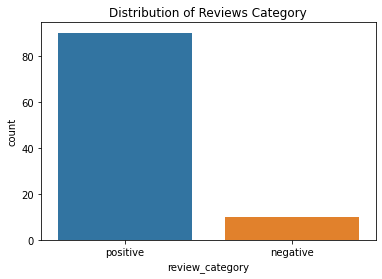

In [25]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [26]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

[' \n pro 1 clean bloatfre oxygeno run smooth come 2 amol screen 90hz refresh rate realli go along make display averag 3 batteri life decent last day normal usag 4 sound qualiti good modestli loud drawback con 5 design actual fit hand well shorter usual breadth bit length better view experi 6 game perform averag similar phone rang better game perform 7 phone look feel premium use 8 alert slider make conveni switch differ mode 9 face unlock fast oneplu phone fast con 1 camera good expect macro len pretti useless main camera lack depth color arent vibrant oneplu 8 bit much beautif selfi shot 4k video record 60fp absent 108060fp perform quit good camera better phone isnt promis 2 headphon jack 3 mono speaker bottom right phone tend get cover hand use also one side phone audio isnt well deliv stereo speaker 4 expand memori slot 5 plastic frame doesnt look like plastic worri thing make phone compar less durabl 6 fingerprint scanner screen isnt quick tradit fingerprint scanner back recommend

In [27]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

[' \n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint ',
 ' \n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint ',
 ' \n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint ',
 ' \n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint ',
 ' \n averag phone one plu surprisingli bad batteri life though good batteri paper disappoint ']

## Generating wordclouds separately for positive and negative reviews

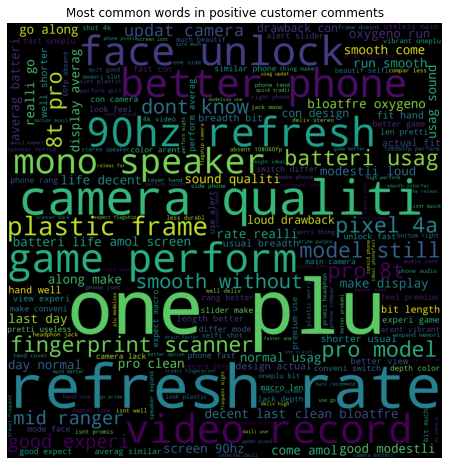

In [28]:
from wordcloud import WordCloud


plt.figure(figsize = (30,8))
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

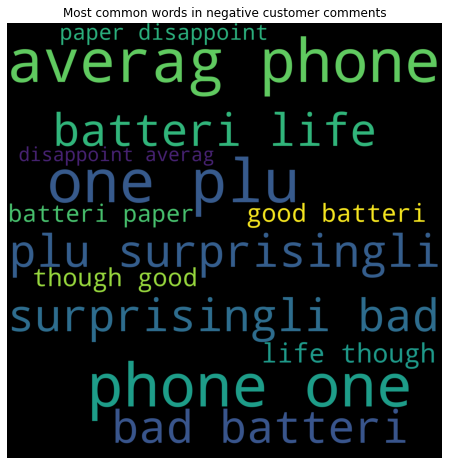

In [29]:
from wordcloud import WordCloud

plt.figure(figsize = (30,8))
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

# Unigrams

Unigrams are just individual words

In [30]:
from collections import Counter

In [31]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [32]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [33]:
top_20_positive_review_words

[('phone', 190),
 ('camera', 170),
 ('good', 160),
 ('one', 150),
 ('also', 100),
 ('', 90),
 ('\n', 90),
 ('pro', 90),
 ('smooth', 90),
 ('plu', 90),
 ('better', 80),
 ('use', 80),
 ('rate', 70),
 ('charg', 70),
 ('screen', 60),
 ('experi', 60),
 ('perform', 60),
 ('look', 60),
 ('feel', 60),
 ('oneplu', 60)]

In [34]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [35]:
top_20_negative_review_words

[('', 20),
 ('batteri', 20),
 ('\n', 10),
 ('averag', 10),
 ('phone', 10),
 ('one', 10),
 ('plu', 10),
 ('surprisingli', 10),
 ('bad', 10),
 ('life', 10),
 ('though', 10),
 ('good', 10),
 ('paper', 10),
 ('disappoint', 10)]

Defining a function to produce a barplot of the most common words

In [36]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

Using the above function, to produce barplots for positive and negative reviews separately

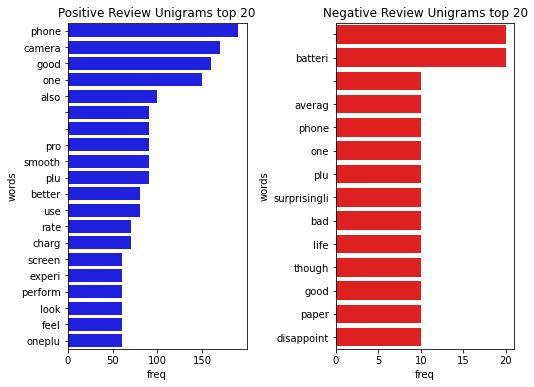

In [37]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams.

# Bigrams

Bigrams are a combination of 2 words

In [38]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

Creating bigrams for postive and negative reviews separately.

In [39]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [40]:
positive_reviews_bigrams[:5]

['_\n \n_pro pro_1 1_clean clean_bloatfre bloatfre_oxygeno oxygeno_run run_smooth smooth_come come_2 2_amol amol_screen screen_90hz 90hz_refresh refresh_rate rate_realli realli_go go_along along_make make_display display_averag averag_3 3_batteri batteri_life life_decent decent_last last_day day_normal normal_usag usag_4 4_sound sound_qualiti qualiti_good good_modestli modestli_loud loud_drawback drawback_con con_5 5_design design_actual actual_fit fit_hand hand_well well_shorter shorter_usual usual_breadth breadth_bit bit_length length_better better_view view_experi experi_6 6_game game_perform perform_averag averag_similar similar_phone phone_rang rang_better better_game game_perform perform_7 7_phone phone_look look_feel feel_premium premium_use use_8 8_alert alert_slider slider_make make_conveni conveni_switch switch_differ differ_mode mode_9 9_face face_unlock unlock_fast fast_oneplu oneplu_phone phone_fast fast_con con_1 1_camera camera_good good_expect expect_macro macro_len len

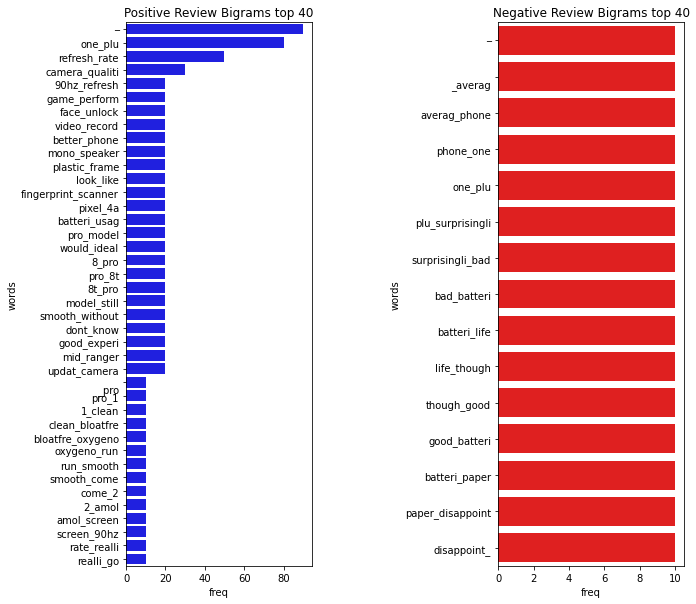

In [41]:
rcParams['figure.figsize'] = 10,10
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

From the above barplot, we can see that the most common bigram
* positive reviews are refresh_rate, oneplus, camera_quality, 90Hz_refresh, etc. 
* The most common bigrams in negative reviews are avarage, bad_battery, disappoint, avarage_phone, etc. but its frequency is aroung 10.